In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

2023-02-13 12:18:51.747567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Validate the model with the dataset collected again in same phone

## iPhone6S_I
iPhone6S_I(ii)

In [10]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone6S/iPhone6S_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I_BeSh.csv', header=False)

[0.0390625-0.03125j   0.0078125+0.j        0.0078125-0.0234375j ...
 0.0546875+0.0234375j 0.0078125-0.046875j  0.015625 +0.0078125j]
2048
135317
(2048, 135317)
[0.02546153 0.01366557 0.00427903 ... 0.00281807 0.00462026 0.01327868]
0
(10000, 2048)
(10000,)
[0.0078125-0.015625j  0.0234375-0.0078125j 0.0078125-0.0078125j ...
 0.03125  -0.0234375j 0.03125  -0.015625j  0.046875 -0.0078125j]
2048
119078
(2048, 119078)
[0.02263446 0.01218112 0.00445602 ... 0.00229932 0.00412573 0.01206476]
1
(20000, 2048)
(20000,)
[0.015625 -0.03125j   0.03125  +0.j        0.0078125-0.015625j  ...
 0.0234375-0.0078125j 0.       -0.046875j  0.       -0.015625j ]
2048
110376
(2048, 110376)
[0.02308455 0.0121083  0.00366661 ... 0.0021352  0.00424122 0.01211808]
2
(30000, 2048)
(30000,)
[ 0.015625 -0.0234375j  0.0234375-0.0234375j  0.0234375-0.015625j  ...
  0.0234375-0.015625j  -0.0078125-0.03125j    0.0390625-0.03125j  ]
2048
123906
(2048, 123906)
[0.02295604 0.01222045 0.00480958 ... 0.00225782 0.00426049 0.0

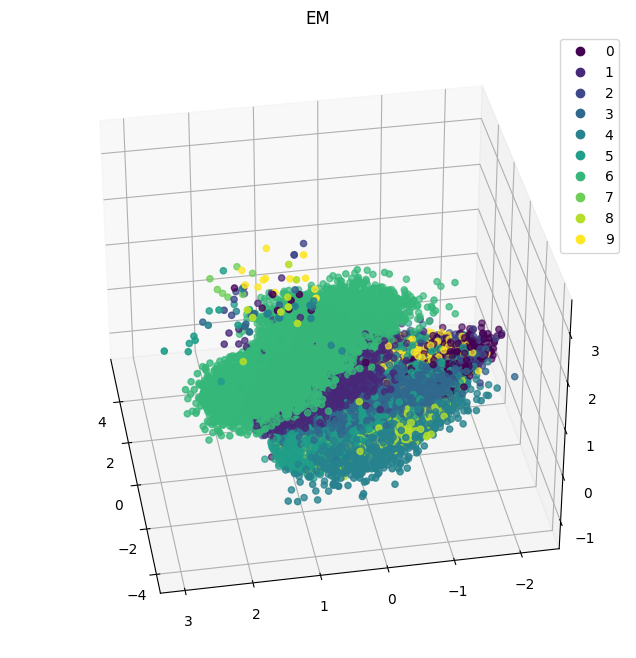

In [11]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_new_scatter.pdf')

Build a model for iPhone6S_I_BeSh newly collected dataset

In [3]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I_BeSh.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.398823,0.594740,1.000000,0.893716,0.853952,0.582946,0.598289,0.518689,0.426065,0.360653,...,0.190170,0.180566,0.293047,0.407764,0.516495,0.669821,0.928022,1.000000,0.595012,0.0
2,0.794037,0.755550,0.117768,0.104919,0.091822,0.028986,0.076928,0.081320,0.119771,0.113510,...,0.076958,0.166952,0.153064,0.174446,0.227556,0.078562,0.032087,0.032773,0.731460,0.0
3,0.788869,0.725854,0.023490,0.096182,0.103796,0.070950,0.033790,0.110176,0.024867,0.094192,...,0.056855,0.083026,0.111868,0.018636,0.177798,0.168730,0.117947,0.011858,0.734319,0.0
4,0.814057,0.746808,0.042705,0.085337,0.059465,0.052745,0.073577,0.173360,0.031110,0.200654,...,0.102582,0.076426,0.110522,0.017851,0.052703,0.109470,0.063547,0.094984,0.763692,0.0
5,0.817245,0.751434,0.055510,0.032552,0.031445,0.103412,0.180107,0.148020,0.122878,0.054224,...,0.104482,0.181988,0.089265,0.204404,0.168808,0.114201,0.097019,0.018672,0.752809,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.607516,0.570277,0.128229,0.200916,0.119385,0.050645,0.045477,0.124227,0.034021,0.042873,...,0.154433,0.056158,0.068906,0.087375,0.145115,0.142682,0.110136,0.091415,0.545291,9.0
99997,0.603028,0.543779,0.062965,0.037756,0.146746,0.022527,0.067059,0.095127,0.161389,0.146440,...,0.104431,0.153587,0.086743,0.033899,0.061409,0.089781,0.078074,0.095386,0.532153,9.0
99998,0.610319,0.546425,0.085272,0.274689,0.330591,0.073897,0.105560,0.132009,0.079436,0.081106,...,0.052902,0.094136,0.143507,0.125421,0.107111,0.113202,0.044711,0.110045,0.567417,9.0
99999,0.627740,0.580840,0.042563,0.074937,0.162314,0.090148,0.100398,0.196822,0.132896,0.094694,...,0.231292,0.158178,0.066868,0.105081,0.158671,0.089199,0.032053,0.092879,0.547882,9.0


In [4]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5")

2023-02-12 15:07:21.431876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 24s 7ms/step - loss: 6.3124 - accuracy: 0.2018
test loss, test acc: [6.312421798706055, 0.20178000628948212]


In [14]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 13s 4ms/step
[7 8 1 ... 2 0 2]
7


In [15]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[2194  630 2565  704    0    3   16  366 1506 2016]
 [   7    0   46    0    0    0 6226  375  638 2708]
 [1489 1227 3627 1041    0    3    9  314 1230 1060]
 [1824  531 2175  360    0    0   14  372 1496 3228]
 [5192  424 1432  660    0    4   12  210 1063 1003]
 [2912  973 3010  999    0   16   13  154  807 1116]
 [   0    0    2    0    0    0 9639   66   56  237]
 [1046 2142 4137 1194    0    3    9  144  525  800]
 [3543  872 2994 2030   15   76   10   24  380   56]
 [1781  182 1348  243    0    0   40  687 1901 3818]]
              precision    recall  f1-score   support

           0       0.11      0.22      0.15     10000
           1       0.00      0.00      0.00     10000
           2       0.17      0.36      0.23     10000
           3       0.05      0.04      0.04     10000
           4       0.00      0.00      0.00     10000
           5       0.15      0.00      0.00     10000
           6       0.60      0.96      0.74     10000
           7       0.05      0.01   

Test Accuracy:0.20178


Text(0.5, 1.0, 'Accuracy:0.202')

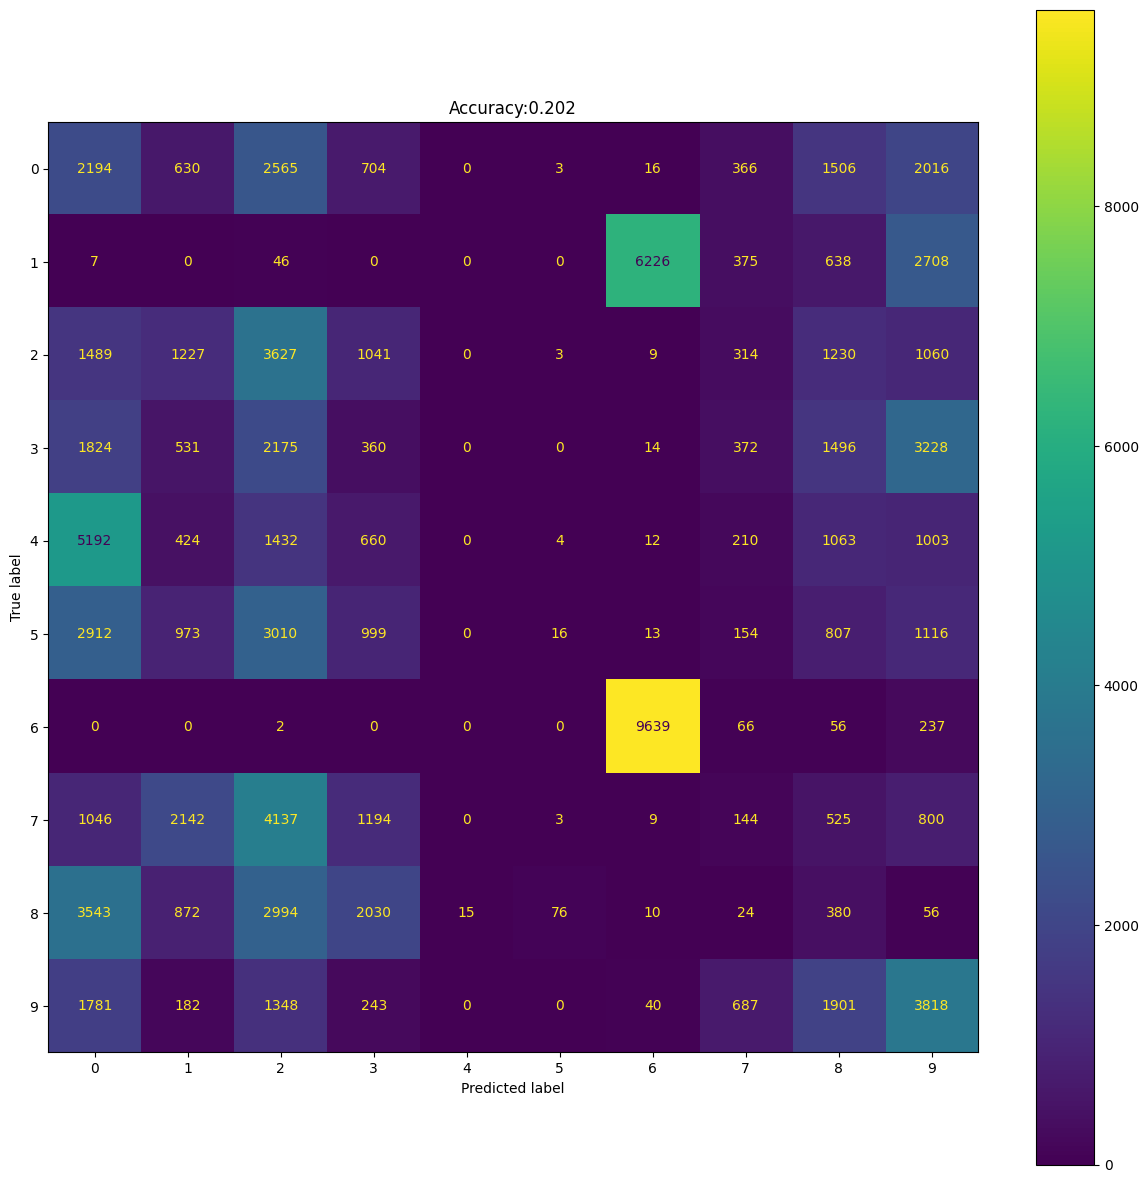

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## Apply transfer learning for the samples by only training the output layer

In [16]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I_BeSh.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.398823,0.594740,1.000000,0.893716,0.853952,0.582946,0.598289,0.518689,0.426065,0.360653,...,0.190170,0.180566,0.293047,0.407764,0.516495,0.669821,0.928022,1.000000,0.595012,0.0
2,0.794037,0.755550,0.117768,0.104919,0.091822,0.028986,0.076928,0.081320,0.119771,0.113510,...,0.076958,0.166952,0.153064,0.174446,0.227556,0.078562,0.032087,0.032773,0.731460,0.0
3,0.788869,0.725854,0.023490,0.096182,0.103796,0.070950,0.033790,0.110176,0.024867,0.094192,...,0.056855,0.083026,0.111868,0.018636,0.177798,0.168730,0.117947,0.011858,0.734319,0.0
4,0.814057,0.746808,0.042705,0.085337,0.059465,0.052745,0.073577,0.173360,0.031110,0.200654,...,0.102582,0.076426,0.110522,0.017851,0.052703,0.109470,0.063547,0.094984,0.763692,0.0
5,0.817245,0.751434,0.055510,0.032552,0.031445,0.103412,0.180107,0.148020,0.122878,0.054224,...,0.104482,0.181988,0.089265,0.204404,0.168808,0.114201,0.097019,0.018672,0.752809,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.607516,0.570277,0.128229,0.200916,0.119385,0.050645,0.045477,0.124227,0.034021,0.042873,...,0.154433,0.056158,0.068906,0.087375,0.145115,0.142682,0.110136,0.091415,0.545291,9.0
99997,0.603028,0.543779,0.062965,0.037756,0.146746,0.022527,0.067059,0.095127,0.161389,0.146440,...,0.104431,0.153587,0.086743,0.033899,0.061409,0.089781,0.078074,0.095386,0.532153,9.0
99998,0.610319,0.546425,0.085272,0.274689,0.330591,0.073897,0.105560,0.132009,0.079436,0.081106,...,0.052902,0.094136,0.143507,0.125421,0.107111,0.113202,0.044711,0.110045,0.567417,9.0
99999,0.627740,0.580840,0.042563,0.074937,0.162314,0.090148,0.100398,0.196822,0.132896,0.094694,...,0.231292,0.158178,0.066868,0.105081,0.158671,0.089199,0.032053,0.092879,0.547882,9.0


In [17]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [18]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [21]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 16s 5ms/step - loss: 2.5789 - accuracy: 0.2624
Epoch 2/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.7188 - accuracy: 0.3463
Epoch 3/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5767 - accuracy: 0.3877
Epoch 4/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5274 - accuracy: 0.4070
Epoch 5/25
3125/3125 [==============================] - 17s 5ms/step - loss: 1.5020 - accuracy: 0.4187
Epoch 6/25
3125/3125 [==============================] - 19s 6ms/step - loss: 1.4861 - accuracy: 0.4268
Epoch 7/25
3125/3125 [==============================] - 18s 6ms/step - loss: 1.4758 - accuracy: 0.4313
Epoch 8/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.4672 - accuracy: 0.4369
Epoch 9/25
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4604 - accuracy: 0.4417
Epoch 10/25
3125/3125 [==============================] - 16s 5ms/step - l

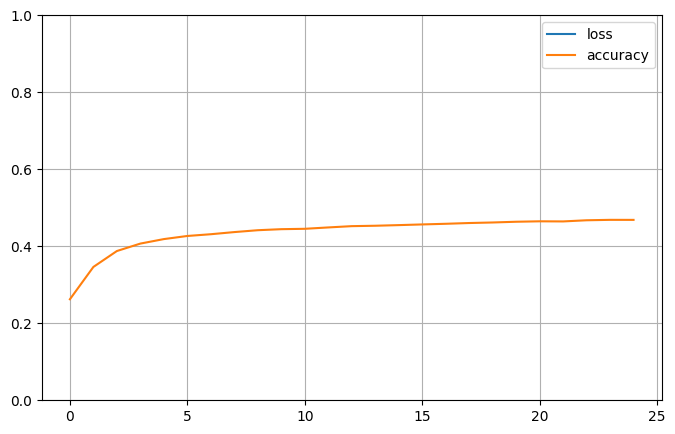

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the accuracy

In [23]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 20s 6ms/step - loss: 1.4073 - accuracy: 0.4705
test loss, test acc: [1.407339334487915, 0.47049999237060547]


In [24]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 13s 4ms/step
[8 4 5 ... 2 4 4]
8


In [25]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 868   79  761 2085 2031  520   11  989  753 1903]
 [   0 8086    0   26    0    0 1509    0    0  379]
 [ 449   10 2174 1410 1165  702   10 2302 1112  666]
 [ 227  109  643 3944 1417  499   10  646  324 2181]
 [ 210   10  311  926 5540  496   13  269 1125 1100]
 [ 263   12  876 1605 2085 1151   14 1309 1975  710]
 [   0 1344    0    0    0    0 8642    0    0   14]
 [ 309    1 1293  865  303  594   11 5216 1265  143]
 [ 103    2  502  175 1349  635    9  890 6305   30]
 [ 311  508  326 1751 1480  175   14  216   95 5124]]
              precision    recall  f1-score   support

           0       0.32      0.09      0.14     10000
           1       0.80      0.81      0.80     10000
           2       0.32      0.22      0.26     10000
           3       0.31      0.39      0.35     10000
           4       0.36      0.55      0.44     10000
           5       0.24      0.12      0.16     10000
           6       0.84      0.86      0.85     10000
           7       0.44      0.52   

Test Accuracy:0.4705


Text(0.5, 1.0, 'Accuracy:0.470')

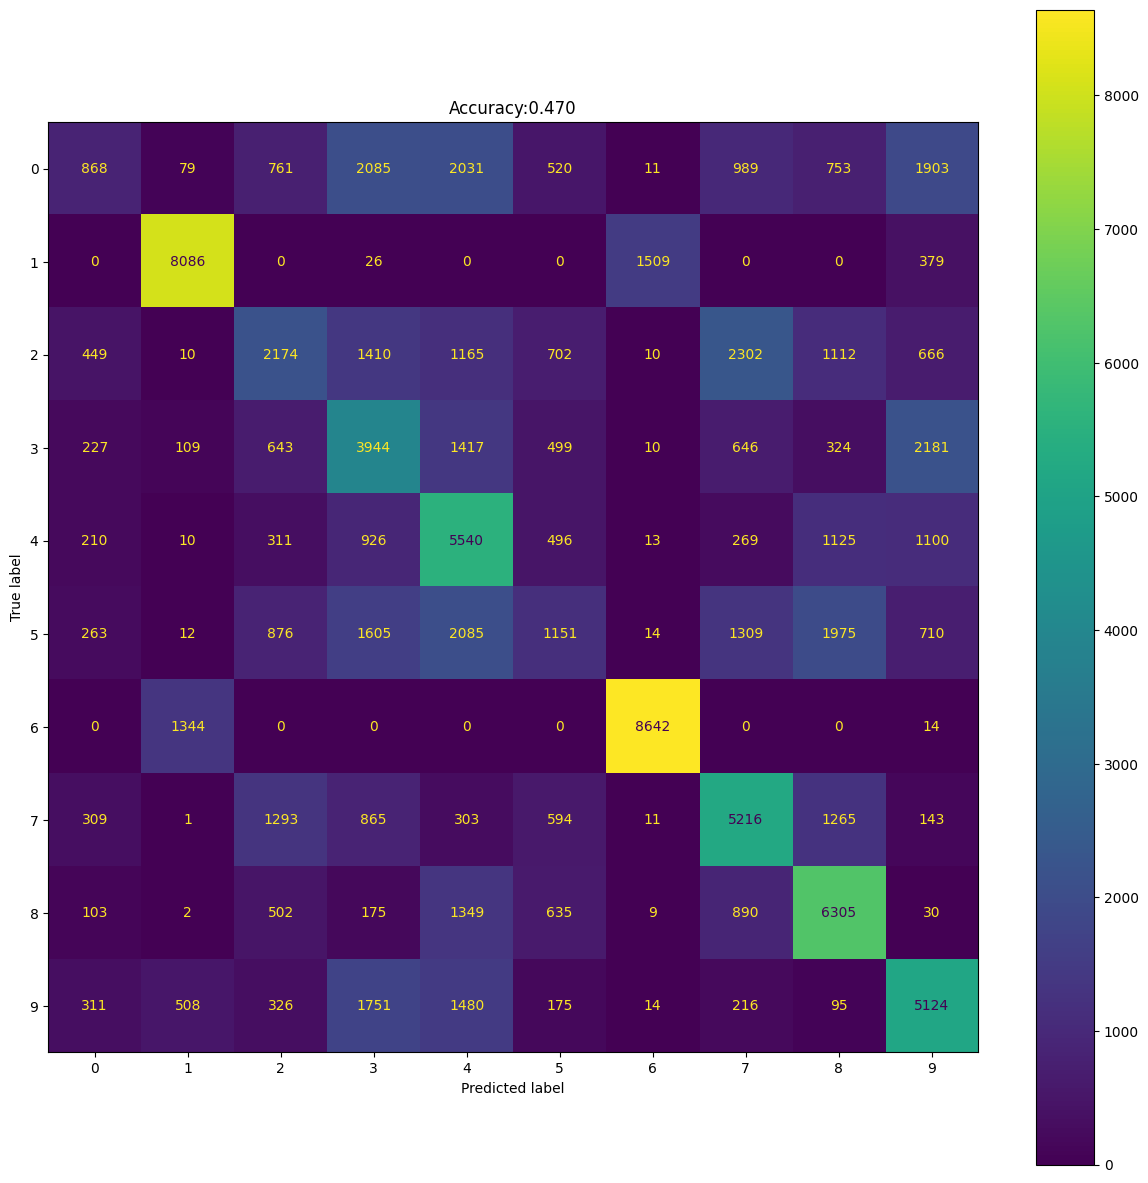

In [26]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## new sample Own model

## Validation with another samples
Validate with iPhone6s_I_BeSh dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone 6S_Beer Sheva,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallary_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "webbrowser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I_BeSh.csv', header=False)

[0.0078125-0.03125j   0.0234375-0.015625j  0.       -0.015625j  ...
 0.015625 -0.03125j   0.015625 -0.0234375j 0.0234375-0.015625j ]
2048
145922
(2048, 145922)
[0.02337346 0.01257491 0.00380188 ... 0.00212662 0.0039589  0.01270302]
0
(10000, 2048)
(10000,)
[ 0.0234375-0.015625j   0.0234375-0.0078125j  0.0234375-0.015625j  ...
  0.046875 +0.j        -0.015625 -0.0078125j  0.046875 -0.015625j ]
2048
158064
(2048, 158064)
[0.02290634 0.01239741 0.0045376  ... 0.00201616 0.00456291 0.01222033]
1
(20000, 2048)
(20000,)
[0.0234375-0.0234375j 0.015625 +0.j        0.0078125-0.0234375j ...
 0.0390625-0.03125j   0.       -0.0078125j 0.015625 +0.j       ]
2048
131661
(2048, 131661)
[0.02290835 0.01234141 0.00433436 ... 0.00230845 0.00446289 0.0121475 ]
2
(30000, 2048)
(30000,)
[-0.015625 +0.0234375j  0.0390625-0.046875j   0.0078125+0.015625j  ...
  0.0234375-0.046875j   0.015625 +0.0078125j  0.0390625-0.0234375j]
2048
143513
(2048, 143513)
[0.03454116 0.01952716 0.00571871 ... 0.00543358 0.006045

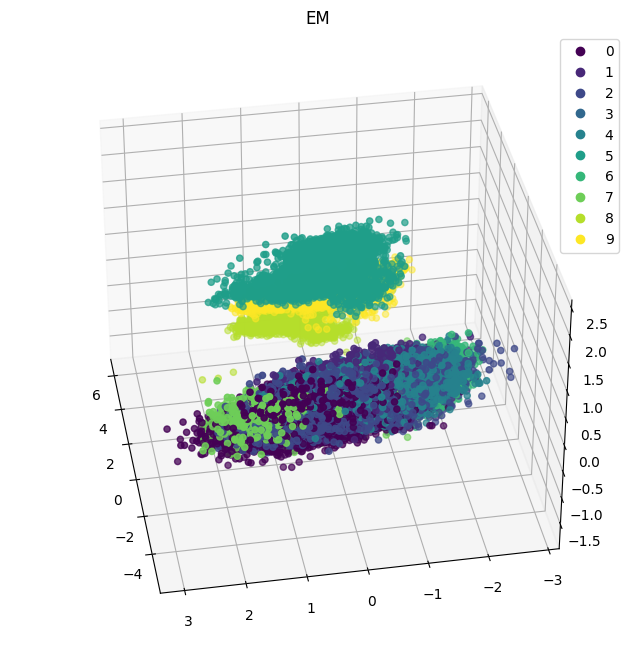

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_BeSh_scatter.pdf')

In [7]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5")

2023-02-13 12:50:47.433158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 9.2762 - accuracy: 0.1047
test loss, test acc: [9.276227951049805, 0.10470999777317047]


In [9]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 15s 5ms/step
[7 6 6 ... 6 6 6]
7


In [10]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[  92    0   26    0    0    0 8570  121  305  886]
 [  32    0    0    0    0    0 9731   32   41  164]
 [  36    0    0    0    0    0 9613   42   50  259]
 [   0    1    0    0    0    0 9942    2    1   54]
 [   4    0    0    0    0    0 9898    4   24   70]
 [   0    0    0    0    0    0 9909    5    0   86]
 [  13    0    0    0    0    0 9859    8   30   90]
 [   5    0    5    0    0    0 9497   21    7  465]
 [   4   14    0    4    0    0  892 2484  392 6210]
 [   0    0    0    0    0    0 9890    2    1  107]]
              precision    recall  f1-score   support

           0       0.49      0.01      0.02     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.11      0.99      0.20     10000
           7       0.01      0.00   

Test Accuracy:0.10471


Text(0.5, 1.0, 'Accuracy:0.105')

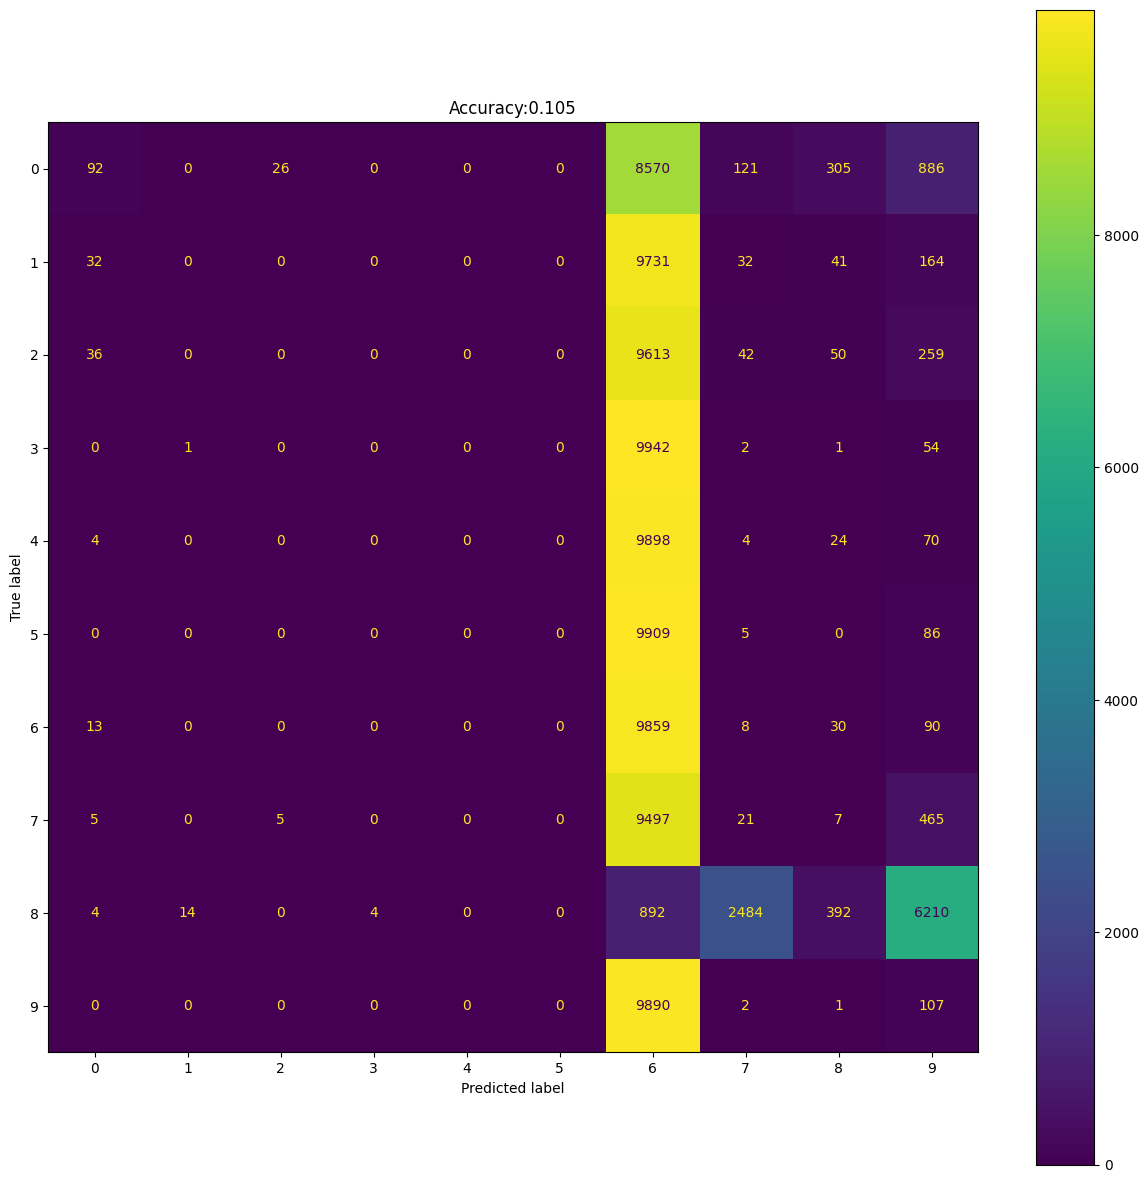

In [11]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

Apply transfer learning 

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [13]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [14]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 14s 4ms/step - loss: 2.6411 - accuracy: 0.1430
Epoch 2/25
3125/3125 [==============================] - 12s 4ms/step - loss: 1.8164 - accuracy: 0.3352
Epoch 3/25
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5883 - accuracy: 0.4352
Epoch 4/25
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4884 - accuracy: 0.4709
Epoch 5/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.4309 - accuracy: 0.4877
Epoch 6/25
3125/3125 [==============================] - 17s 6ms/step - loss: 1.3931 - accuracy: 0.4991
Epoch 7/25
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3651 - accuracy: 0.5075
Epoch 8/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.3437 - accuracy: 0.5133
Epoch 9/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.3260 - accuracy: 0.5191
Epoch 10/25
3125/3125 [==============================] - 13s 4ms/step - l

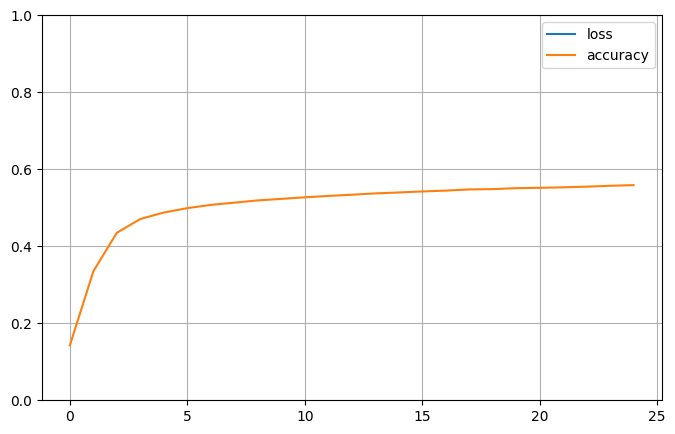

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 1.2030 - accuracy: 0.5610
test loss, test acc: [1.203018069267273, 0.5609599947929382]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 16s 5ms/step
[8 6 0 ... 9 9 9]
8


In [18]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[5597  733  676    9  661   71  555 1486  194   18]
 [1714 2183 1369    7 2086  385  953 1216   53   34]
 [1857 1371 2111   12 1607  251 1237 1442   68   44]
 [   0    0    0 8170    0  442    3   13   10 1362]
 [ 659 1079  978   15 3872  371 1970  862   25  169]
 [  25  117   91  461  234 7021  467  422   36 1126]
 [ 569  360  620   27 1245  380 5870  694   30  205]
 [1365  379  581   52  378  242  536 6289  119   59]
 [  55    2    0   36    0   14   29   48 9804   12]
 [  18    3    9 3139   29 1356   95  154   18 5179]]
              precision    recall  f1-score   support

           0       0.47      0.56      0.51     10000
           1       0.35      0.22      0.27     10000
           2       0.33      0.21      0.26     10000
           3       0.68      0.82      0.75     10000
           4       0.38      0.39      0.39     10000
           5       0.67      0.70      0.68     10000
           6       0.50      0.59      0.54     10000
           7       0.50      0.63   

Test Accuracy:0.56096


Text(0.5, 1.0, 'Accuracy:0.561')

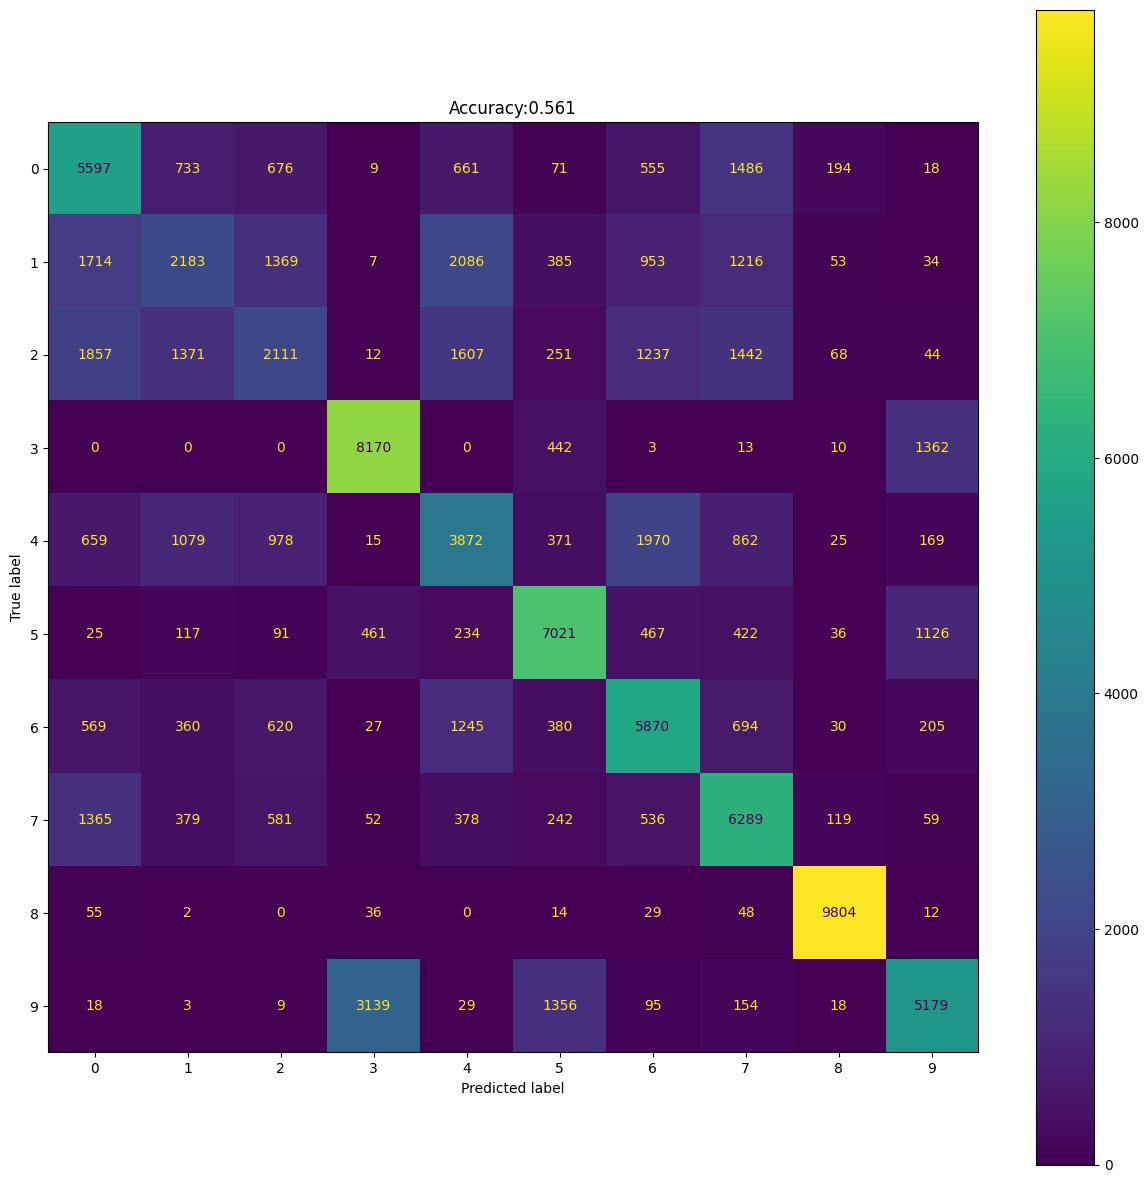

In [19]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## Besh Model

Create an own model of newly collected samples of iPhone6S_I_BeSh by trainig the whole dataset for validate the time of training and accuracy level 

In [5]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

2022-10-12 14:00:50.635497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_BeSh_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 23s 9ms/step - loss: 2.0866 - accuracy: 0.2636 - val_loss: 1.7796 - val_accuracy: 0.4509
Epoch 2/25
2532/2532 [==============================] - 24s 10ms/step - loss: 1.3859 - accuracy: 0.6535 - val_loss: 1.0443 - val_accuracy: 0.7438
Epoch 3/25
2532/2532 [==============================] - 24s 9ms/step - loss: 0.7524 - accuracy: 0.8097 - val_loss: 0.5287 - val_accuracy: 0.8642
Epoch 4/25
2532/2532 [==============================] - 30s 12ms/step - loss: 0.3759 - accuracy: 0.9080 - val_loss: 0.2571 - val_accuracy: 0.9427
Epoch 5/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.1765 - accuracy: 0.9657 - val_loss: 0.1170 - val_accuracy: 0.9797
Epoch 6/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0916 - accuracy: 0.9849 - val_loss: 0.0681 - val_accuracy: 0.9892
Epoch 7/25
2532/2532 [==============================] - 25s 10ms/step - loss: 0.0575 - accuracy: 0.9906 - val_loss: 0.0485 - v

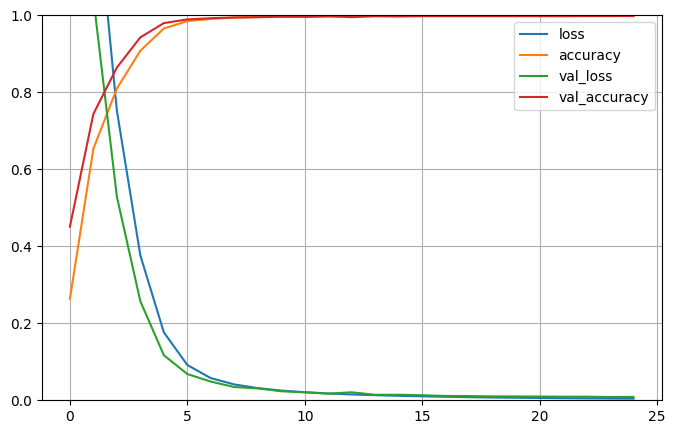

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the Own iPhone6S_I_BeSh Model

In [10]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_BeSh_model.h5")

In [11]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0093 - accuracy: 0.9975
test loss, test acc: [0.009289531968533993, 0.9975000023841858]


In [12]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1008    0    1    0    1    0    0    1    0    0]
 [   0 1008    2    0    0    0    0    0    0    0]
 [   2    0  985    0    2    0    1    3    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   1    3    0    0 1038    0    1    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    1    0  997    1    0    0]
 [   3    0    2    0    0    0    0  969    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1011
         1.0       1.00      1.00      1.00      1010
         2.0       0.99      0.99      0.99       993
         3.0       1.00      1.00      1.00       939
         4.0       1.00      1.00      1.00      1043
         5.0       1.00      1.00      1.00      1027
         6.0       1.00      1.00      1.00       999
         7.0       0.99      0.99   